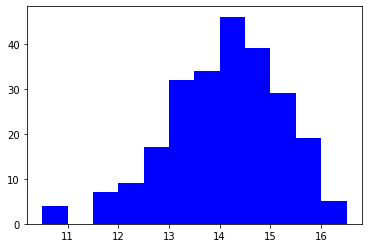

[ 4.  0.  7.  9. 17. 32. 34. 46. 39. 29. 19.  5.]
[10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5 15.  15.5 16.  16.5]

SF count:  241.0


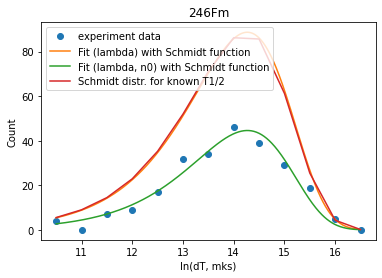

Lambda:  [6.36361984e-07]
Cov:  [[1.70084138e-14]]
Max:  [14.26749828]
T1/2, mks:  [1571432.65207119]
popt1:  [6.35441633e-07 5.02925636e-01]
pcov1:  [[1.38207401e-15 6.57501339e-13]
 [6.57501339e-13 4.32633335e-04]]
T1/2, mks:  1573708.6583302957


In [19]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
from random import randint

# Schmidt fit
# Eur.Phys.J.A(2000)8:141-145 https://link.springer.com/content/pdf/10.1007/s100500070129.pdf
# Z.Phys.A-AtomsandNuclei316,19-26(1984) https://link.springer.com/content/pdf/10.1007/BF01415656.pdf

times_mks = np.array([36524,43330,52955,54271,113700,121933,134890,144682,148865,155592,161577,164368,181860,188046,196222,202754,226749,242346,249782,258321,270012,271440,281185,296368,299862,300615,312508,315593,336648,370767,383361,389309,389374,397739,398456,439250,442057,452550,457111,472086,519749,520160,542842,543900,547212,560199,568640,569050,569147,572258,595751,605581,608221,611537,635777,641818,651118,657705,659498,680663,686695,687737,691133,693151,695360,704195,714467,718245,729140,734282,739135,765680,770597,776670,791079,791281,830004,831423,835344,845631,855774,857804,857904,863115,875960,923219,940752,942173,969721,1018440,1021543,1040264,1060258,1070730,1076474,1094055,1095854,1102891,1136800,1147042,1147673,1165807,1175543,1205504,1207641,1229477,1250520,1258926,1266665,1296905,1304362,1354650,1360761,1393567,1422586,1431506,1479266,1479526,1482457,1501297,1512793,1533997,1541311,1552652,1563604,1567138,1572885,1576942,1578327,1640067,1662965,1667516,1670049,1710858,1719173,1725737,1745768,1748321,1787256,1849912,1853142,1867721,1881474,1910925,1916142,1919874,1942862,1950481,1967640,1996480,2015704,2048657,2083599,2084615,2085931,2105196,2115017,2130587,2145883,2148011,2298455,2347357,2369465,2390119,2416033,2419264,2425118,2454562,2521371,2552969,2560871,2567412,2597955,2612767,2622625,2636111,2647522,2745674,2820435,2824437,2996424,3076704,3115273,3132292,3139743,3168477,3187822,3221185,3312057,3326916,3331568,3387556,3390452,3457284,3475049,3580176,3595842,3650872,3653864,3713670,3809895,3925729,3937794,4214167,4334842,4421457,4498298,4510073,4514450,4534601,4561777,4585058,4713642,4943106,5227989,5289596,5305289,5430871,5691595,5717184,6066155,6098794,6108638,6189890,6325792,6835412,7194571,7214873,7252567,7336119,7679297,7751308,7975117,7995507,8415301,8751986,8909050,9075407,9080368,9714142,10657174])
times_ln = np.log(times_mks)
bin_size = 0.5
counts, bins, bars = plt.hist(times_ln.astype('float'), bins=np.arange(10.5, 17.0, step=bin_size), color='blue')
plt.show()
print(counts)
print(bins)

x = bins
y = np.append(counts, 0)

n0 = np.sum(y)
print("\nSF count: ", n0)
lam_approx = 6.4935e-07

def func(x, lam):
    return n0*np.exp(x + np.log(lam))*np.exp(-np.exp(x + np.log(lam)))

def func1(x, lam, n):
    return n*func(x, lam)

popt, pcov = optimize.curve_fit(func, x, y, lam_approx)
popt1, pcov1 = optimize.curve_fit(func1, x, y, [lam_approx, 100])

x_cont = np.arange(x.min(), x.max(), 0.01)

plt.plot(x, y, "o", label='experiment data') 
plt.plot(x_cont, func(x_cont, *popt), label='Fit (lambda) with Schmidt function')
plt.plot(x_cont, func1(x_cont, *popt1), label='Fit (lambda, n0) with Schmidt function')
plt.plot(x, func(x, lam_approx), label='Schmidt distr. for known T1/2')
plt.legend()
plt.title('246Fm')
plt.xlabel('ln(dT, mks)')
plt.ylabel('Count')
plt.show()

print("Lambda: ", popt)
print("Cov: ", pcov)
hl = 1/popt
print("Max: ", np.log(hl))
print("T1/2, mks: ", hl)

print("popt1: ", popt1)
print("pcov1: ", pcov1)
print("T1/2, mks: ", 1/popt1[0])

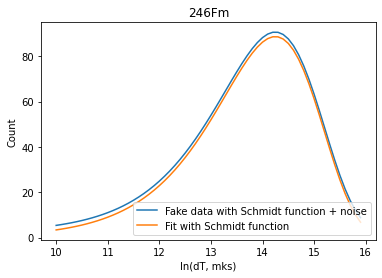

Lambda:  [6.4935e-07]
Cov:  [[0.]]
Max:  [14.24729397]
T1/2, mks:  [1540001.54000154]


In [20]:
# Fake data

def func_with_random(x, lam):
    return n0*np.exp(x + np.log(lam))*np.exp(-np.exp(x + np.log(lam))) + randint(1, 5)

x = np.arange(start=10, stop=16, step=0.1)
y = func(x, lam_approx)
plt.plot(x, func_with_random(x, lam_approx), label='Fake data with Schmidt function + noise')
popt2, pcov2 = optimize.curve_fit(func, x, y, lam_approx)
plt.plot(x, func(x, *popt2), label='Fit with Schmidt function')
plt.legend()
plt.title('246Fm')
plt.xlabel('ln(dT, mks)')
plt.ylabel('Count')
plt.show()

print("Lambda: ", popt2)
print("Cov: ", pcov2)
hl2 = 1/popt2
print("Max: ", np.log(hl2))
print("T1/2, mks: ", hl2)